### PHASE TWO PROJECT -GROUP 3

### 1) PROJECT OVERVIEW
###      1.1 BUSINESS UNDERSTANDING 
###         1.1.1 Business Problem 

A company has decided to create a new movie studio, but they don’t know anything about creating movies. We have been charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of the company's new movie studio can use to help decide what type of films to create.

### 1.1.2 Key Business Questions
* Which Movie Genres have the highest average rating?
* Which Movie Genres have the highest Number of votes?
* What impact does the runtime in minutes has on the average rating?
* How does language influence the average rating and total number of voters of movies?
* How does region influence the number of votes and average ratings of movies?
* 

### 2) DATA UNDERSTANDING 

### 2.1 DATA PREPROCESSING
### 2.1.1 The Data 
To ensure comprehensive analysis of the business problem we retrieved data from the IMDB website (https://www.imdb.com/).The IMDB dataset has eight tables and for this particular project we will focus on three tables, namely 'movie_basics', 'movie_ratings' and 'movie_akas'. These three tables have share a column 'movie_id' which will be our Primary Key. From 'movie_basics' table we focus on 'Genres' and 'Runtime in Minutes'.From  'movie_ratings'  we focus on 'average ratings' and 'number of votes'. From the 'movie_akas' we focus on 'region' and 'language'.

### 2.1.2 DATA PREPARATION
This entails;
* Importing necessary libraries 
* Loading and Accessing of the data set
* Data Cleaning 

### A) Importing necessary libraries  

In [18]:
# importing necessary libraries 
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import pickle

## B) Acessing the Database 

In [19]:
# Connecting to the'im.db' database
conn = sqlite3.connect('im.db')

In [20]:
#accessing tables in the database 
q ='''
SELECT  name 
FROM sqlite_master 
WHERE type='table';
'''
pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


From the above we are able to tell the table  that are contained in our database 

In [21]:
#Viewing columns in the movie_basics table from the database
q = '''
SELECT *
FROM movie_basics;
'''
movie_basics = pd.read_sql(q, conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [22]:
#Viewing columns in the movie_ratings table from the database
q = '''
SELECT *
FROM movie_ratings
'''
movie_ratings = pd.read_sql(q, conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## 3. Data Analysis
* We join movie_basics and movie_rating tables to analyse the rating and total number of votes of movie genres
* we analyse the trend in the rating and number of votes of top rated and voted genres over the years
* we analyse the effect of runtime in minutes, language and region in the rating and number of votes 

In [23]:
# join movie_basics and movie_ratings tables
q = """ 
SELECT movie_id, genres, averagerating, numvotes
FROM movie_basics
   JOIN movie_ratings
   USING(movie_id)
WHERE genres IS NOT NULL
"""
movie_basics_and_ratings = pd.read_sql(q, conn)
movie_basics_and_ratings

,movie_id,genres,averagerating,numvotes
0,tt0063540,"Action,Crime,Drama",7.0,77
1,tt0066787,"Biography,Drama",7.2,43
2,tt0069049,Drama,6.9,4517
3,tt0069204,"Comedy,Drama",6.1,13
4,tt0100275,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73047,tt9913056,Documentary,6.2,5
73048,tt9913084,Documentary,6.2,6
73049,tt9914286,"Drama,Family",8.7,136
73050,tt9914642,Documentary,8.5,8


### 3.1. Number of votes and Rating

#### 3.1.1. Genres with highest number of votes and ratings

In [24]:
# top 10 movie genres with highest number of votes and average rating 
q = """ 
    SELECT genres, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
  GROUP BY genres
  ORDER BY Total_numvotes DESC, Avg_averagerating DESC
     LIMIT 10
    """
genres_top_vote_and_rate = pd.read_sql(q, conn)
genres_top_vote_and_rate

,genres,Total_numvotes,Avg_averagerating
0,"Action,Adventure,Sci-Fi",23023248,5.655906
1,"Action,Adventure,Fantasy",9658883,5.371845
2,"Adventure,Animation,Comedy",8687435,5.936555
3,Drama,8395521,6.494265
4,"Comedy,Drama,Romance",7665463,6.292467
5,"Action,Adventure,Comedy",7256686,5.554032
6,Comedy,6832037,5.777998
7,"Comedy,Drama",6462839,6.364119
8,"Action,Crime,Drama",5563553,5.989146
9,"Drama,Romance",5542760,6.294305


#### 3.1.2. Visualization of movie genres with highest number of votes

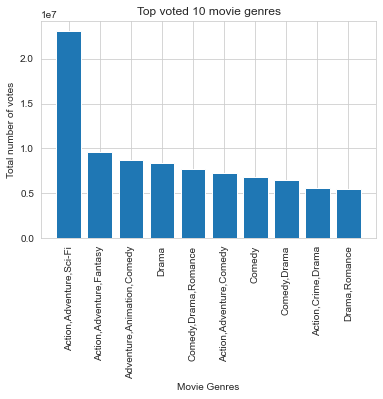

In [25]:
# plot bar graph of top ten genres of movies with highest total number of votes
plt.bar(genres_top_vote_and_rate['genres'], genres_top_vote_and_rate['Total_numvotes'])
plt.xlabel('Movie Genres')
plt.ylabel('Total number of votes')
plt.title('Top voted 10 movie genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### 3.1.3. Visualization of movie genres with highest average rationgs

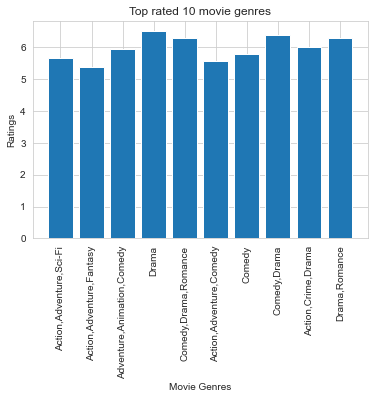

In [26]:
# plot bar graph of top ten genres of movies with highest ratings
plt.bar(genres_top_vote_and_rate['genres'], genres_top_vote_and_rate['Avg_averagerating'])
plt.xlabel('Movie Genres')
plt.ylabel('Ratings')
plt.title('Top rated 10 movie genres')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### 3.2. Movie genre ratings and number of votes over the years

#### 3.2.1. Top five movie genres - votes and ratings over the years

In [27]:
# Total number of votes and ratings of top 5 movies over the years
q = """ 
    SELECT genres, start_year, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
    WHERE genres IS NOT NULL
  GROUP BY genres, start_year
    HAVING genres == 'Action,Adventure,Sci-Fi' OR genres =='Action,Adventure,Fantasy' OR genres == 'Adventure,Animation,Comedy' OR genres == 'Drama' OR genres =='Comedy,Drama,Romance'
  ORDER BY genres, Total_numvotes DESC;
 
    """
genres_votes_over_years = pd.read_sql(q, conn)
genres_votes_over_years.head()

,genres,start_year,Total_numvotes,Avg_averagerating
0,"Action,Adventure,Fantasy",2017,2171754,5.575000
1,"Action,Adventure,Fantasy",2016,2124337,6.292308
2,"Action,Adventure,Fantasy",2011,1650970,4.780000
3,"Action,Adventure,Fantasy",2015,883563,5.033333
4,"Action,Adventure,Fantasy",2010,828729,6.216667


#### 3.2.2. Visualization of number votes of top five movie genres over time 

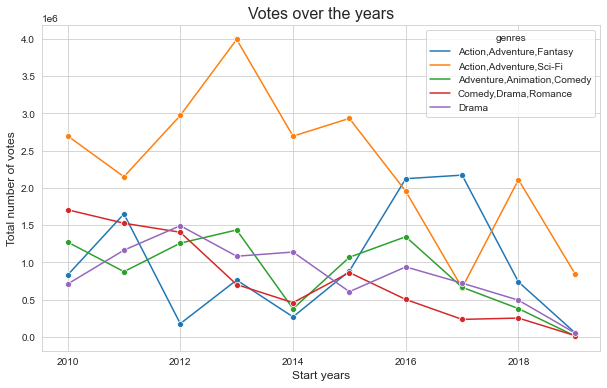

In [28]:
# plot top 5 genres and total number of voters over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data= genres_votes_over_years, x='start_year', y='Total_numvotes', hue='genres', marker='o')

# Customizing the plot
plt.title('Votes over the years', fontsize=16)
plt.xlabel('Start years', fontsize=12)
plt.ylabel('Total number of votes', fontsize=12)
plt.grid(True)
plt.legend(title='genres')
plt.show()

#### 3.2.3. Visualization of average ratings of top five movie genres ovr the years

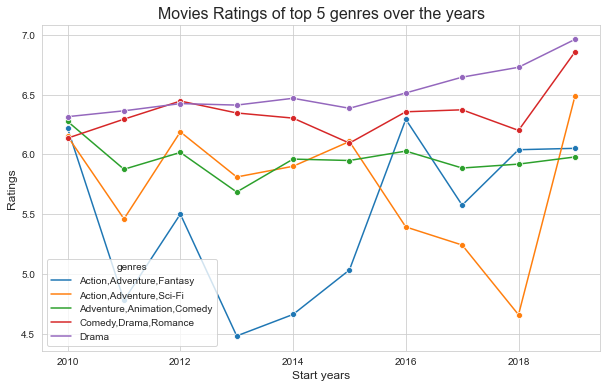

In [29]:
# plot ratings of top 5 genres over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data= genres_votes_over_years, x='start_year', y='Avg_averagerating', hue='genres', marker='o')

plt.title('Movies Ratings of top 5 genres over the years', fontsize=16)
plt.xlabel('Start years', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.grid(True)
plt.legend(title='genres')
plt.show()

### 3.3. Runtime of movies and effect on votes and ratings

In [30]:
# check if there is effect of runtime of movies on rating and votes
# join movie_basics and movie_ratings tables
q = """ 
    SELECT genres, Avg(runtime_minutes) AS Avg_runtime_minutes, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
    WHERE runtime_minutes IS NOT NULL
  GROUP BY genres
  ORDER BY Total_numvotes DESC, Avg_averagerating DESC
     LIMIT 10
    """
movie_runtime = pd.read_sql(q, conn)
movie_runtime

,genres,Avg_runtime_minutes,Total_numvotes,Avg_averagerating
0,"Action,Adventure,Sci-Fi",108.569106,23023053,5.668293
1,"Action,Adventure,Fantasy",108.320000,9658805,5.336000
2,"Adventure,Animation,Comedy",88.448718,8687201,5.944444
3,Drama,97.633723,8342370,6.485779
4,"Comedy,Drama,Romance",100.415876,7662618,6.288870
5,"Action,Adventure,Comedy",97.683333,7256271,5.509583
6,Comedy,96.187880,6763496,5.785491
7,"Comedy,Drama",98.529988,6449680,6.368911
8,"Action,Crime,Drama",104.958491,5561662,5.978302
9,"Drama,Romance",103.239943,5532458,6.271695


### 3.4. Movie languages and ratings and number of votes

In [31]:
# check effect of language on the rating and number of votes of movies
q = '''
SELECT genres, language, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
           JOIN movie_akas
           USING(movie_id)
    WHERE language IS NOT NULL
  GROUP BY language
  ORDER BY Total_numvotes DESC, Avg_averagerating DESC
     LIMIT 10
'''

movie_language = pd.read_sql(q, conn)
movie_language

,genres,language,Total_numvotes,Avg_averagerating
0,"Action,Adventure,Sci-Fi",fr,231092513,6.413583
1,"Action,Adventure,Sci-Fi",tr,212375744,6.179227
2,"Action,Adventure,Sci-Fi",bg,211275380,6.248951
3,"Adventure,Family,Fantasy",en,209264624,6.269339
4,"Action,Adventure,Sci-Fi",he,183490289,6.537221
5,"Adventure,Animation,Comedy",fa,28314980,6.166087
6,"Comedy,Drama,Romance",cmn,18428732,5.834505
7,"Mystery,Sci-Fi,Thriller",hr,16425337,5.851701
8,"Action,Mystery,Thriller",ca,15852436,6.762882
9,"Adventure,Family,Fantasy",sv,15698475,6.811809


### 3.5. Regions and ratings and number of votes

In [32]:
# check effect of region on the rating and number of votes of movies
q = '''
SELECT genres, region, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
           JOIN movie_akas
           USING(movie_id)
    WHERE region IS NOT NULL
  GROUP BY region
  ORDER BY Total_numvotes DESC, Avg_averagerating DESC
     LIMIT 10
'''

movie_language = pd.read_sql(q, conn)
movie_language

,genres,region,Total_numvotes,Avg_averagerating
0,"Action,Adventure,Sci-Fi",US,418957631,6.218606
1,"Action,Adventure,Sci-Fi",GR,314020162,6.418054
2,"Action,Adventure,Sci-Fi",ES,259269856,6.298747
3,"Action,Adventure,Sci-Fi",RU,253657614,6.114330
4,"Action,Adventure,Sci-Fi",BR,242543329,6.188029
5,"Action,Adventure,Sci-Fi",CA,240139452,6.358648
6,"Action,Adventure,Sci-Fi",PL,227107093,6.342997
7,"Action,Adventure,Sci-Fi",HU,221576907,6.315188
8,"Action,Adventure,Sci-Fi",PT,219949216,6.306735
9,"Action,Adventure,Sci-Fi",RS,216622549,6.411964
